# 1. 데이터 전처리

In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

import re
from konlpy.tag import Okt

%matplotlib inline

In [2]:
DATA_IN_PATH = './data_in/'
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file :
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
clean_dataset.csv             1.52MB
real_refined_data.csv         1.12MB
real_test_data.csv            0.55MB
real_train_data.csv           0.57MB
testdata.csv                  0.8MB
traindata.csv                 0.73MB


In [3]:
train_data = pd.read_csv(DATA_IN_PATH+'clean_dataset.csv',sep = ',',
                 names=['sentence', 'label'], header=None, quoting=3)
train_data.head()

,sentence,label
0,개같은 소리 하지마,1
1,좌배 까는건 ㅇㅂ,1
2,개소리야 니가 빨갱이를 옹호하고 드루킹을 ㅇㅇ짓이라고 말못해서 삐진거야 빨갱아,1
3,애새끼가 초딩도 아니고 ㅋㅋㅋㅋ,1
4,731부대의 후예라 그런지 가학적인 아이디어는 세계최고임 이래서 애교만 떨어도 돈 ...,1


In [4]:
def preprocessing(sentence, okt, remove_stopwords = False, stop_words = []):
    # 함수의 인자는 다음과 같다.
    # sentence : 전처리할 텍스트
    # okt : okt 객체를 반복적으로 생성하지 않고 미리 생성후 인자로 받는다.
    # remove_stopword : 불용어를 제거할지 선택 기본값은 False
    # stop_word : 불용어 사전은 사용자가 직접 입력해야함 기본값은 비어있는 리스트
    
    # 1. 한글 및 공백을 제외한 문자 모두 제거.
    sentence_text = re.sub("[ㄱ-ㅎㅏ-ㅣ\\s]+", "", sentence) 
    
    
    # 2. okt 객체를 활용해서 형태소 단위로 나눈다.
    wd_sentence = okt.morphs(sentence_text, stem=True)
    
    if remove_stopwords:
        
        # 불용어 제거(선택적)
        wd_sentence = [token for token in wd_sentence if not token in stop_words]
        
   
    return wd_sentence

In [5]:
#특수문자 제거
import re

only_sentences = train_data.iloc[:,[0]]
print(only_sentences)
sentence_without_Special_Characters  = []
for sentence in train_data['sentence'][:]:
    tmp = re.sub("[^가-힣 ㄱ-ㅎ ㅏ-ㅣ \\s]", "", sentence) #특수문자 제거
    tmp = re.sub("([ㄱ-ㅎㅏ-ㅣ]+)", "", tmp) #자음, 모음 제거
    tmp = re.sub("<[^>]*>", "", tmp)  #html 제거
    tmp = re.sub("[\r|\n]", "", tmp) #\r, \n 제거 
    tmp = re.sub("(http|https|ftp)://(?:[-\w.]|(?::\da-fA-F]{2}))+", "", tmp) #url 제거
#     comment_without_Special_Characters.append(re.sub(r'\s+' , "", tmp)) #이중 space 제거  --> 단어 몇갠지 봐야되서 아직 하면 안됨
    sentence_without_Special_Characters.append(tmp) #이중 space 제거

index = 0
for sentence in sentence_without_Special_Characters:
    train_data['sentence'][index] = sentence
    index += 1

train_data

                                                sentence
0                                             개같은 소리 하지마
1                                              좌배 까는건 ㅇㅂ
2            개소리야 니가 빨갱이를 옹호하고 드루킹을 ㅇㅇ짓이라고 말못해서 삐진거야 빨갱아
3                                      애새끼가 초딩도 아니고 ㅋㅋㅋㅋ
4      731부대의 후예라 그런지 가학적인 아이디어는 세계최고임 이래서 애교만 떨어도 돈 ...
...                                                  ...
16483                                둘이 친구인 데는 이유가 있었네요.
16484                              톰과 잭이 둘이 친구군요? 이럴 수가.
16485                           내일 드디어 개강이네. 개강 준비는 잘했어?
16486            그럭저럭한 것 같아. 종강한 지 별로 안된 것 같은데 벌써 개강이라니.
16487                                            좋은 소식이야

[16488 rows x 1 columns]


,sentence,label
0,개같은 소리 하지마,1
1,좌배 까는건,1
2,개소리야 니가 빨갱이를 옹호하고 드루킹을 짓이라고 말못해서 삐진거야 빨갱아,1
3,애새끼가 초딩도 아니고,1
4,부대의 후예라 그런지 가학적인 아이디어는 세계최고임 이래서 애교만 떨어도 돈 벌리는...,1
...,...,...
16483,둘이 친구인 데는 이유가 있었네요,0
16484,톰과 잭이 둘이 친구군요 이럴 수가,0
16485,내일 드디어 개강이네 개강 준비는 잘했어,0
16486,그럭저럭한 것 같아 종강한 지 별로 안된 것 같은데 벌써 개강이라니,0


# 2. 데이터 분석

In [6]:
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file :
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
clean_dataset.csv             1.52MB
real_refined_data.csv         1.12MB
real_test_data.csv            0.55MB
real_train_data.csv           0.57MB
testdata.csv                  0.8MB
traindata.csv                 0.73MB


In [7]:
print('전체 학습데이터의 개수: {}'.format(len(train_data)))

전체 학습데이터의 개수: 16488


In [8]:
train_length = train_data['sentence'].astype(str).apply(len)
train_length.head()

0     10
1      7
2     41
3     13
4    103
Name: sentence, dtype: int64

Text(0, 0.5, 'Number of Sentence')

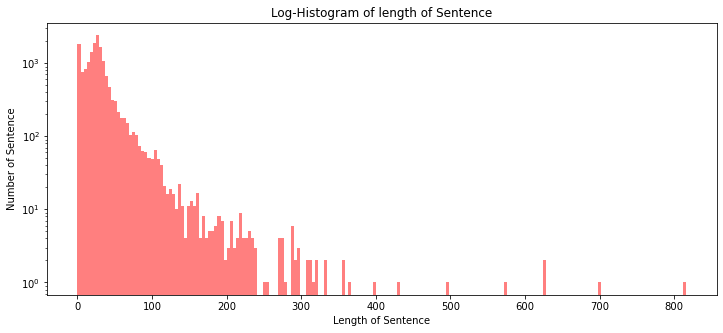

In [9]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of length of Sentence')
# 그래프 x 축 라벨
plt.xlabel('Length of Sentence')
# 그래프 y 축 라벨
plt.ylabel('Number of Sentence')

In [10]:
print('문장 길이 최대 값: {}'.format(np.max(train_length)))
print('문장 길이 최소 값: {}'.format(np.min(train_length)))
print('문장 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('문장 길이 중간 값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('문장 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('문장 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

문장 길이 최대 값: 816
문장 길이 최소 값: 0
문장 길이 평균 값: 30.19
문장 길이 표준편차: 31.47
문장 길이 중간 값: 25.0
문장 길이 제 1 사분위: 15.0
문장 길이 제 3 사분위: 34.0


{'whiskers': [<matplotlib.lines.Line2D at 0x263edf260d0>,
 'caps': [<matplotlib.lines.Line2D at 0x263edf26790>,
 'boxes': [<matplotlib.lines.Line2D at 0x263edf1bd30>],
 'medians': [<matplotlib.lines.Line2D at 0x263edf26e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x263edf4a4f0>],
 'means': [<matplotlib.lines.Line2D at 0x263edf4a190>]}

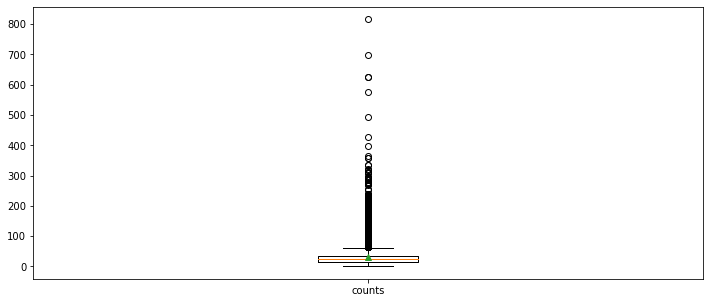

In [11]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(train_length,
             labels=['counts'],
             showmeans=True)

In [12]:
label_zero = train_data.loc[train_data['label']== '0'] #욕X
label_one = train_data.loc[train_data['label']== '1'] #욕O
print("긍정 리뷰 개수: {}".format(train_data['label'].value_counts()[0]))
print("부정 리뷰 개수: {}".format(train_data['label'].value_counts()[1]))

긍정 리뷰 개수: 8127
부정 리뷰 개수: 6505


In [13]:
# 라벨 비율 맞추기
class_difference = len(label_one) - len(label_zero)
sample_frac = 1 - (class_difference / len(label_one))
print(sample_frac)
label_one = label_one.sample(frac = sample_frac)
print("라벨이 0인 data 개수 : {}".format(len(label_zero)))
print("라벨이 1인 data 개수 : {}".format(len(label_one)))

0.8004183585578935
라벨이 0인 data 개수 : 6505
라벨이 1인 data 개수 : 6505


In [14]:
total_clean_dataset = pd.concat([label_one, label_zero])
#정제된 데이터 csv로 추출
total_clean_dataset.to_csv(DATA_IN_PATH + "real_refined_data.csv", index = False ) 

# test/train  data  나누기 

In [15]:
label_zero1 = label_zero[:3252] #train
label_zero2 = label_zero[3252:] #test
label_one1 = label_one[:3252] #train
label_one2 = label_one[3252:] #test

train_data = pd.concat([label_zero1, label_one1])
test_data = pd.concat([label_zero2, label_one2])

In [16]:
train_data.to_csv(DATA_IN_PATH + "real_train_data.csv", index = False ) #정제된 데이터 csv로 추출
test_data.to_csv(DATA_IN_PATH + "real_test_data.csv", index = False ) #정제된 데이터 csv로 추출